# REGRESSION METHODS

#### In this file, various types of regressions are analyzed in order to determine the accuracy of the model 

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\sasha\Desktop\PRI\DATASETS\Admission_Predict.csv")
df = df.iloc[:,1:]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
corr_matrix = df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


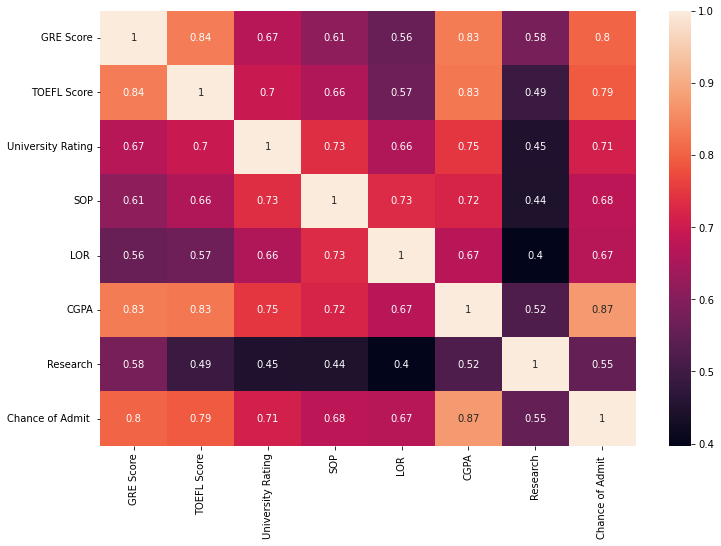

In [5]:
#plotting the correlation matrix as a heatmap

fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

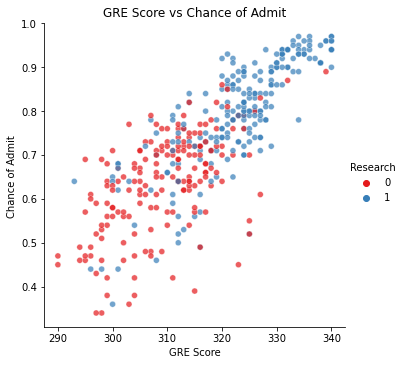

In [6]:
#plotting data which have high correlation

sns.relplot(data=df,x="GRE Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7)
plt.title("GRE Score vs Chance of Admit")
plt.show()

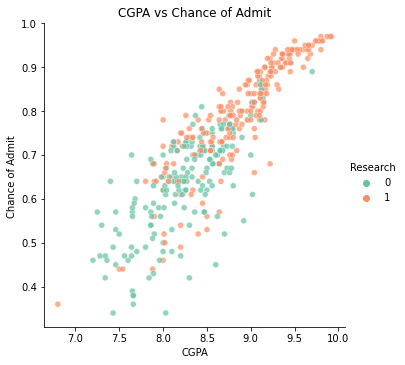

In [7]:
sns.relplot(data=df,x="CGPA",y="Chance of Admit ",hue="Research",
            palette="Set2",alpha=0.7)
plt.title("CGPA vs Chance of Admit")
plt.show()

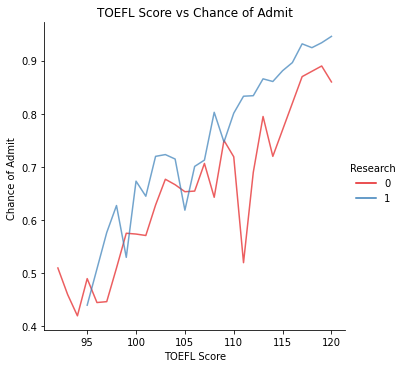

In [8]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

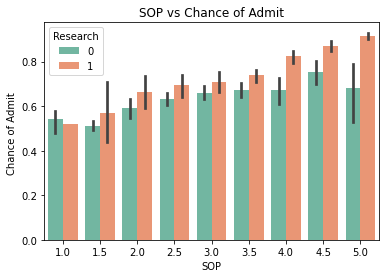

In [9]:
sns.barplot(data=df,x="SOP",y="Chance of Admit ",
            palette="Set2",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

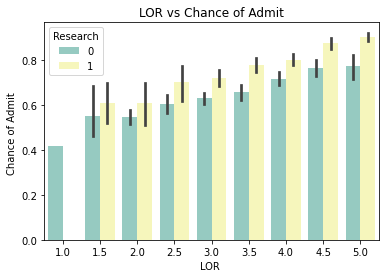

In [10]:
sns.barplot(data=df,x="LOR ",y="Chance of Admit ",
            palette="Set3",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

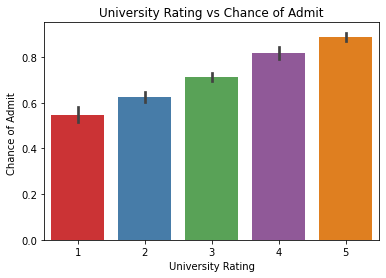

In [11]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit ",
            palette="Set1")
plt.title("University Rating vs Chance of Admit")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [13]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA"]]
y = df["Chance of Admit "].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Multiple Linear Regression

In [14]:
#implying multiple linear regression and determining its score

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.815


#### Decision Tree Regression

In [15]:
#implying decision tree regression and determining its score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.616


#### Random Forest Regression

In [16]:
#implying random forest regression and determining its score

ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.804


In [18]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_scaled = mm.fit_transform(x)

In [19]:
x_scaled

array([[0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
        0.91346154],
       [0.68      , 0.53571429, 0.75      , 0.75      , 0.875     ,
        0.66346154],
       [0.52      , 0.42857143, 0.5       , 0.5       , 0.625     ,
        0.38461538],
       ...,
       [0.8       , 0.85714286, 0.75      , 1.        , 0.875     ,
        0.84935897],
       [0.44      , 0.39285714, 0.5       , 0.625     , 0.75      ,
        0.63461538],
       [0.86      , 0.89285714, 0.75      , 1.        , 0.75      ,
        0.91666667]])

## Splitting Train & Test Data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=1)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
pred_test = lr.predict(x_test)

In [23]:
pred_test

array([[0.7370616 ],
       [0.66832033],
       [0.78074384],
       [0.77510667],
       [0.84494821],
       [0.65334632],
       [0.64847183],
       [0.5535911 ],
       [0.50257436],
       [0.93602867],
       [0.80555655],
       [0.92919713],
       [0.87770853],
       [0.66178502],
       [0.72427965],
       [0.69577077],
       [0.80616514],
       [0.86249348],
       [0.49282115],
       [0.69754626],
       [0.66693036],
       [0.76690379],
       [0.82991497],
       [0.91355964],
       [0.64985696],
       [0.58220633],
       [0.71736843],
       [0.69401311],
       [0.89728008],
       [0.64529417],
       [0.94875358],
       [0.64505063],
       [0.8142976 ],
       [0.7729422 ],
       [0.70454444],
       [0.63324399],
       [0.41918116],
       [0.6700484 ],
       [0.90202933],
       [0.77397146],
       [0.86416678],
       [0.68664087],
       [0.87754726],
       [0.62963647],
       [0.97572282],
       [0.73659885],
       [0.72750786],
       [0.819

In [24]:
y_test

array([[0.67],
       [0.64],
       [0.8 ],
       [0.81],
       [0.86],
       [0.58],
       [0.73],
       [0.56],
       [0.54],
       [0.94],
       [0.87],
       [0.95],
       [0.93],
       [0.67],
       [0.73],
       [0.64],
       [0.89],
       [0.9 ],
       [0.44],
       [0.71],
       [0.57],
       [0.7 ],
       [0.82],
       [0.94],
       [0.65],
       [0.34],
       [0.74],
       [0.72],
       [0.93],
       [0.66],
       [0.96],
       [0.65],
       [0.78],
       [0.78],
       [0.75],
       [0.5 ],
       [0.36],
       [0.62],
       [0.91],
       [0.78],
       [0.83],
       [0.69],
       [0.89],
       [0.54],
       [0.96],
       [0.76],
       [0.76],
       [0.8 ],
       [0.66],
       [0.66],
       [0.55],
       [0.61],
       [0.82],
       [0.63],
       [0.76],
       [0.92],
       [0.49],
       [0.45],
       [0.77],
       [0.85],
       [0.91],
       [0.57],
       [0.91],
       [0.72],
       [0.59],
       [0.76],
       [0.

#### Mean Squared Error (MSE)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(pred_test,y_test)

In [26]:
mse

0.004260810050671112

#### Root Mean Squared Error (RMSE)

In [27]:
rmse = np.sqrt(mse)

In [28]:
rmse

0.06527488070208257

#### R2 Score

In [29]:
r2_score(pred_test, y_test)

0.7168318679092451

#### Mean Absolute Error (MAE)

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred_test, y_test)

0.0455524319663054

### Confusion Matrix

In [34]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

In [35]:
from sklearn import metrics

In [36]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [37]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [38]:
import matplotlib.pyplot as plt

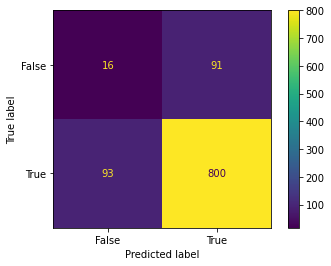

In [39]:
cm_display.plot()
plt.show()

In [44]:
Accuracy = metrics.accuracy_score(actual, predicted)
Accuracy

0.816

In [43]:
Precision = metrics.precision_score(actual, predicted)
Precision

0.8978675645342312

In [45]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
Sensitivity_recall

0.8958566629339306

In [46]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
Specificity

0.14953271028037382

In [48]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity})

{'Accuracy': 0.816, 'Precision': 0.8978675645342312, 'Sensitivity_recall': 0.8958566629339306, 'Specificity': 0.14953271028037382}


### Classification Report

In [56]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.15      0.15      0.15       107
           1       0.90      0.90      0.90       893

    accuracy                           0.82      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.82      0.82      0.82      1000



## Validation Methods

### 1. K-Fold

In [62]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


### 2.Stratified K-Fold

In [63]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5


### 3. Leave-One-Out (LOO)

In [64]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


### 4. Leave-P-Out (LPO)

In [65]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeavePOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9382997762863534
Number of CV Scores used in Average:  11175


### 5.Shuffle Split

In [66]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.93333333 0.93333333 0.91111111 0.93333333 0.95555556]
Average CV Score:  0.9333333333333333
Number of CV Scores used in Average:  5


### Creating Pickle (.pkl) file for Integrating in Flask Environment

In [49]:
import pickle
pickle.dump(multiple_lin_reg, open("Multiple_Linear_Regression.pkl", "wb"))